In [194]:
import numpy as np
import pandas as pd
import re
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[loading file paths source](https://www.youtube.com/watch?v=kem2y-SawPw)

In [210]:
ch83dg = pd.read_csv('./cleaned_data/ch83dg.csv')
ch83m = pd.read_csv('./cleaned_data/ch83m.csv')
ch83pru = pd.read_csv('./cleaned_data/ch83pru.csv')
ch83q = pd.read_csv('./cleaned_data/ch83q.csv')
ch89dg = pd.read_csv('./cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('./cleaned_data/ch89m.csv')
ch89pru = pd.read_csv('./cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('./cleaned_data/ch89q.csv')
ch93pru = pd.read_csv('./cleaned_data/ch93pru.csv')
ch93q = pd.read_csv('./cleaned_data/ch93q.csv')
chtaim = pd.read_csv('./cleaned_data/chtaim.csv')
chtaipru = pd.read_csv('./cleaned_data/chtaipru.csv')
chtaiq = pd.read_csv('./cleaned_data/chtaiq.csv')

###### general EDA ideas

EDA ideas:

smoking and respiratory questionaire results

cancer and food consumption

infections and income

all vascular disease mortality and food consumption

liver disease and alcohol




###### Mortality data EDA

In [214]:
ch89m.shape, ch83m.shape 
# there are more mortality features in 
# ch89m than in ch83m

((201, 123), (207, 72))

In [196]:
ch83m.head()

,Unnamed: 0,county,sex,xiang,m001,m002,m003,m004,m005,m006,...,m086,m087,m088,m103,m104,m105,m106,m107,m113,m117
0,2,AA,M,3,3.67,72.03,124.01,143.89,14.87,97.10,...,15.59,NaN,NaN,14.44,NaN,18.36,10.61,7.75,4.13,0.00
1,5,AA,F,3,3.20,42.49,74.48,100.46,7.67,59.48,...,12.62,1.00,0.0,12.64,0.31,16.02,9.71,6.30,4.73,0.09
2,8,AA,T,3,3.44,57.26,99.25,122.17,11.27,78.29,...,14.11,NaN,NaN,13.54,NaN,17.19,10.16,7.03,4.43,0.04
3,11,AB,M,3,5.01,67.69,138.61,170.09,16.66,110.54,...,21.42,NaN,NaN,13.81,NaN,25.04,14.33,10.71,3.97,0.00
4,14,AB,F,3,3.84,51.36,101.97,127.78,8.83,65.11,...,19.69,1.75,0.4,11.57,0.37,19.19,11.97,7.22,3.75,0.00


In [197]:
ch83m.drop('Unnamed: 0', axis = 1, inplace=True)

I will inspect the mortality dataframe.

In [198]:
ch83m.loc[:,"county"].isna()==1

0      False
1      False
2      False
3      False
4      False
       ...  
202    False
203    False
204    False
205    False
206    False
Name: county, Length: 207, dtype: bool

In [199]:
list(ch83m[ch83m.loc[:,"county"].isna()==1].index.values)

[102, 103, 104]

In [200]:
# county with name NA was made into a nan value durring data cleaning,
# and so I am manually updating the value
ch83m.loc[ch83m[ch83m.loc[:,"county"].isna()==1].index.values,'county'] = "NA"

The data are in floating point numbers and there are 68 categories/subcategories of death attribution.

In [201]:
ch83m.columns

Index(['county', 'sex', 'xiang', 'm001', 'm002', 'm003', 'm004', 'm005',
       'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm015', 'm016',
       'm017', 'm018', 'm021', 'm022', 'm023', 'm025', 'm027', 'm028', 'm029',
       'm030', 'm031', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040',
       'm041', 'm042', 'm043', 'm044', 'm045', 'm048', 'm049', 'm058', 'm059',
       'm060', 'm061', 'm062', 'm063', 'm064', 'm065', 'm066', 'm067', 'm068',
       'm069', 'm070', 'm071', 'm072', 'm073', 'm074', 'm075', 'm077', 'm086',
       'm087', 'm088', 'm103', 'm104', 'm105', 'm106', 'm107', 'm113', 'm117'],
      dtype='object')

In [202]:
ch83m.shape

(207, 71)

''

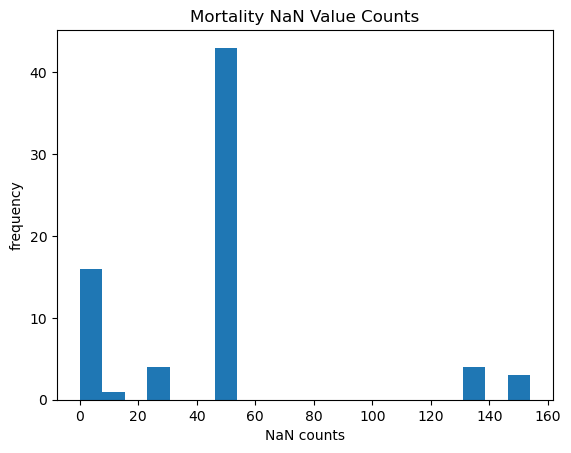

In [203]:
# how many nan values?

plt.hist(ch83m.isna().sum().values, bins = 20)
plt.title('Mortality NaN Value Counts')
plt.xlabel('NaN counts')
plt.ylabel('frequency')
;

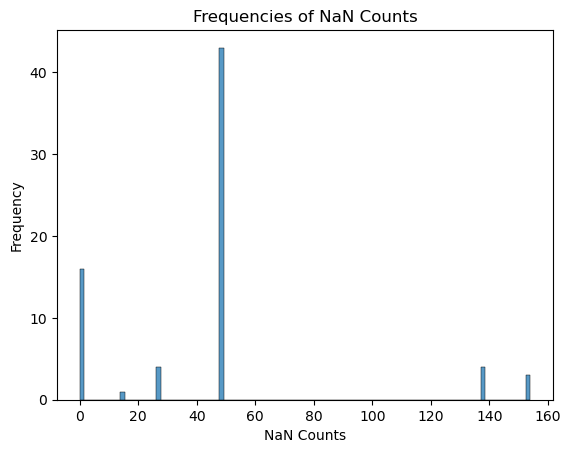

In [204]:
sns.histplot(ch83m.isna().sum().values, bins = 100).set(
    title="Frequencies of NaN Counts", xlabel='NaN Counts', ylabel='Frequency');

In [205]:
nan_dict = {'M':ch83m[ch83m['sex']=='M'].isna().sum(), 
            'F':ch83m[ch83m['sex']=='F'].isna().sum(), 
            'T':ch83m[ch83m['sex']=='T'].isna().sum()}
missing_vals = pd.DataFrame.from_dict(nan_dict)
missing_vals.head()

,M,F,T
county,0,0,0
sex,0,0,0
xiang,0,0,0
m001,9,9,9
m002,9,9,9


I'll check if missing values are consistent by sex. This [source](https://www.statology.org/pandas-check-if-multiple-columns-are-equal/) provided code.

In [206]:
# I'll check if missing values are consistent my sex
missing_vals.eq(missing_vals.iloc[:, 0], axis=0).all(1).sum()


64

In [207]:
# there are slightly more nan values for the male categories than female.
missing_vals.sum()

M    1143
F     846
T    1212
dtype: int64

In [208]:
# all the descriptive columns for ch89m

mortality_cols_descriptive = \
['ALL0_4','ALL5_14','ALL15_34','ALL0_34','ALL35_69','ALL70_79','MEDICALb', 'MEDICALc',
'NONMEDb', 'NONMEDc', 'INFECTb', 'INFECTc', 'INTESTINb', 'INTESTINc','PULMTBb',
'PULMTBc', 'OTHERTBb', 'OTHERTBc', 'VIRALHEPb', 'VIRALHEPc', 'SCHISTOc', 'ALLCAb', 
'ALLCAc', 'MOUTHCAc', 'NASOPCAc', 'NPConlyc', 'OESOPHCAc', 'OESOPHCAc', 'COLRECCAc', 'LIVERCAb', 
'LIVERCAc', 'PANCRSCAc', 'BLADDCAc', 'LARYNXCAc', 'LUNGCAmc', 'LUNGCAfc', 'BREASTCAc', 'CERVIXCAc', 
'BRAINCAc', 'LYMPHOMAc', 'LEUKEMIAb', 'LEUKEMIAc', 'ENDOCRINb', 'ENDOCRINc', 'DIABETESc', 'MALNUTRIb', 
'MALNUTRIc', 'BLOODb', 'BLOODc', 'MENTALb', 'MENTALc', 'NERVOUSb', 'NERVOUSc', 'MENINGITb', 'MENINGITc', 
'EPILEPSYb', 'EPILEPSYc', 'ALLVASCb', 'ALLVASCc', 'RHEUMHDb', 'RHEUMHDc', 'HYPTENSc', 'IHDc', 'STROKEb', 'STROKEc',
'VASC_STRb', 'VASC-STRc', 'ALLRESPb', 'ALLRESPc', 'PNEUMONb', 'PNEUMONc', 'COPDc', 'DIGESTIVb', 'DIGESTIVc',
'PEPULCERc', 'ENTCOLc', 'INTESTOBc', 'CIRRHOSb', 'CIRRHOSc', 'TOTLIVRb', 'TOTLIVRc', 'GALLBILc', 'GENITURc',
'GENITURmc', 'GENITURfc', 'RENALc', 'PREGBRTHb', 'PREGBRTHc', 'ALLSKINc', 'MUSCSKELc', 'ILL_DEFb', 'ILL_DEFc',
'ACCIDENTb', 'ACCIDENTc', 'ROADACCb', 'ROADACCc', 'DROWNb', 'DROWNc', 'SUICIDEb', 'SUICIDEc', 'HOMICIDEb',
'HOMICIDEc', 'INFANT', 'MATERNAL', 'ALLCUMa', 'MEDICALa', 'NONMEDa', 'RESPINFa', 'ALLGIa', 'CONGENITa', 
'NTDa', 'CONGENHDa', 'PERINATa', 'LOWBTHWTa', 'BTHTRAUMa', 'RDSa', 'NEOTETANa', 'MALNUTRIa', 'DROWNa'
]

In [209]:
ch89m.columns

Index(['Unnamed: 0', 'county', 'sex', 'xiang', 'm001', 'm002', 'm003', 'm004',
       'm005', 'm006',
       ...
       'm110', 'm111', 'm112', 'm113', 'm114', 'm115', 'm116', 'm117', 'm118',
       'm119'],
      dtype='object', length=123)

In [181]:
cols_0_3 = ch89m.columns[0:4]

In [182]:
new_cols = list(cols_0_3) + list(mortality_cols_descriptive)

[concatenate elementwise](https://stackoverflow.com/questions/51482134/concatenate-zipped-values-in-python)

In [185]:
new_cols[4:] = [f'{code}_{descr}' for code, descr in \
                zip(ch89m.columns.values[4:], mortality_cols_descriptive)]

In [186]:
new_cols

['Unnamed: 0',
 'county',
 'sex',
 'xiang',
 'm001_ALL0_4',
 'm002_ALL5_14',
 'm003_ALL15_34',
 'm004_ALL0_34',
 'm005_ALL35_69',
 'm006_ALL70_79',
 'm007_MEDICALb',
 'm008_MEDICALc',
 'm009_NONMEDb',
 'm010_NONMEDc',
 'm011_INFECTb',
 'm012_INFECTc',
 'm013_INTESTINb',
 'm014_INTESTINc',
 'm015_PULMTBb',
 'm016_PULMTBc',
 'm017_OTHERTBb',
 'm018_OTHERTBc',
 'm019_VIRALHEPb',
 'm020_VIRALHEPc',
 'm021_SCHISTOc',
 'm022_ALLCAb',
 'm023_ALLCAc',
 'm024_MOUTHCAc',
 'm025_NASOPCAc',
 'm026_NPConlyc',
 'm027_OESOPHCAc',
 'm028_OESOPHCAc',
 'm029_COLRECCAc',
 'm030_LIVERCAb',
 'm031_LIVERCAc',
 'm032_PANCRSCAc',
 'm033_BLADDCAc',
 'm034_LARYNXCAc',
 'm035_LUNGCAmc',
 'm036_LUNGCAfc',
 'm037_BREASTCAc',
 'm038_CERVIXCAc',
 'm039_BRAINCAc',
 'm040_LYMPHOMAc',
 'm041_LEUKEMIAb',
 'm042_LEUKEMIAc',
 'm043_ENDOCRINb',
 'm044_ENDOCRINc',
 'm045_DIABETESc',
 'm046_MALNUTRIb',
 'm047_MALNUTRIc',
 'm048_BLOODb',
 'm049_BLOODc',
 'm050_MENTALb',
 'm051_MENTALc',
 'm052_NERVOUSb',
 'm053_NERVOUSc',
 'm

In [187]:
ch89m_cols_descr = pd.Series(data=new_cols, name='ch89m_cols_descr')
ch89m_cols_descr.to_csv('./descriptive_columns/ch89m_cols_descr.csv')

In [188]:
ch89m_rename = dict(zip(ch89m.columns.values,new_cols))
ch89m = ch89m.rename(ch89m_rename,axis=1)

In [189]:
ch89m.columns[0:20]

Index(['Unnamed: 0', 'county', 'sex', 'xiang', 'm001_ALL0_4', 'm002_ALL5_14',
       'm003_ALL15_34', 'm004_ALL0_34', 'm005_ALL35_69', 'm006_ALL70_79',
       'm007_MEDICALb', 'm008_MEDICALc', 'm009_NONMEDb', 'm010_NONMEDc',
       'm011_INFECTb', 'm012_INFECTc', 'm013_INTESTINb', 'm014_INTESTINc',
       'm015_PULMTBb', 'm016_PULMTBc'],
      dtype='object')

In [ ]:
ch89m.drop()

There may be different age distributions between counties.  Not sure how to correct for this, get deaths per 100_000 of folks in that age band...

Now looking for the most prevalent **recorded** causes of mortality ...

In [190]:
ch89m.describe().loc['mean',:].sort_values(ascending=False)

Unnamed: 0        304.820896
m069_ALLRESPc     270.939950
m072_COPDc        251.440299
m004_ALL0_34      220.173990
m065_STROKEc      213.171642
                     ...    
m047_MALNUTRIc      0.859303
m118_MALNUTRIa      0.655202
m117_NEOTETANa      0.568939
m019_VIRALHEPb      0.548030
m111_NTDa           0.321465
Name: mean, Length: 121, dtype: float64